In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix ,roc_curve,roc_auc_score,classification_report

In [17]:
data=pd.read_csv("heart_disease.csv")
df=pd.DataFrame(data)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

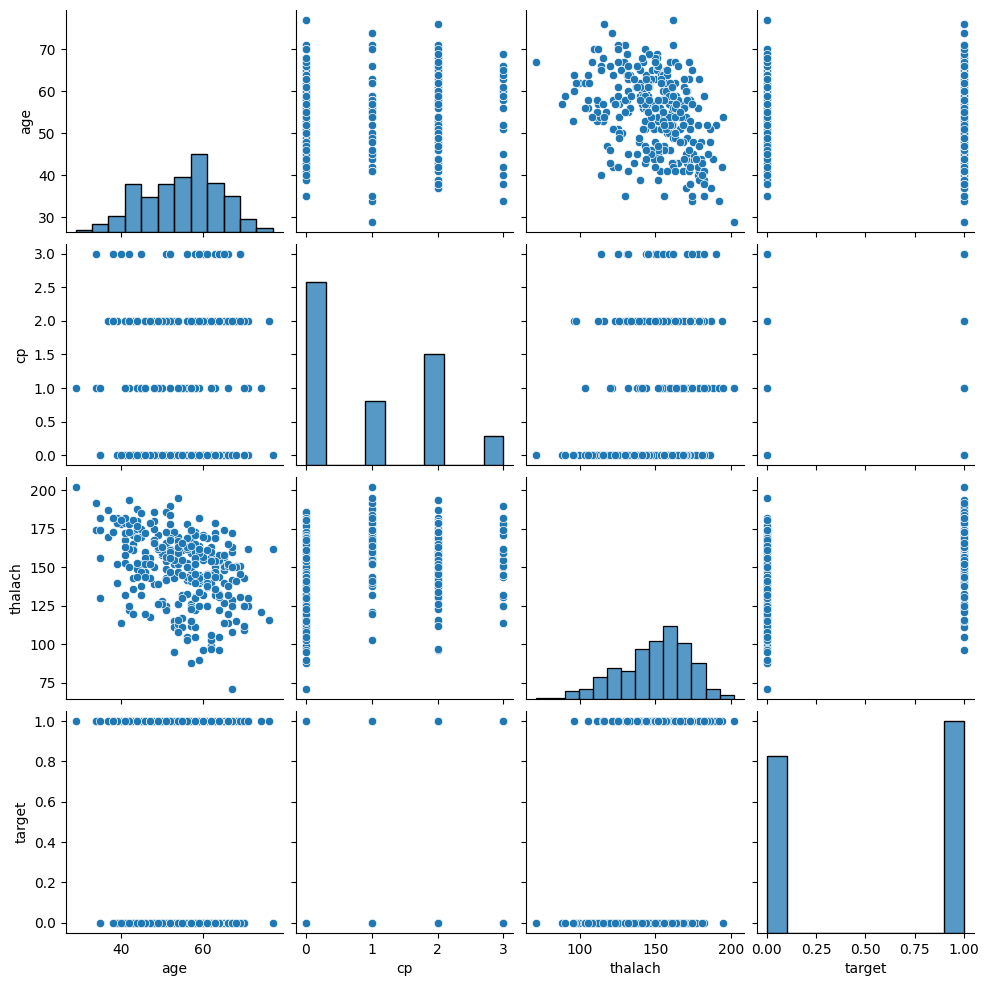

In [13]:
print(df.describe())
sns.pairplot(df[['age','cp','thalach','target']])
plt.show()

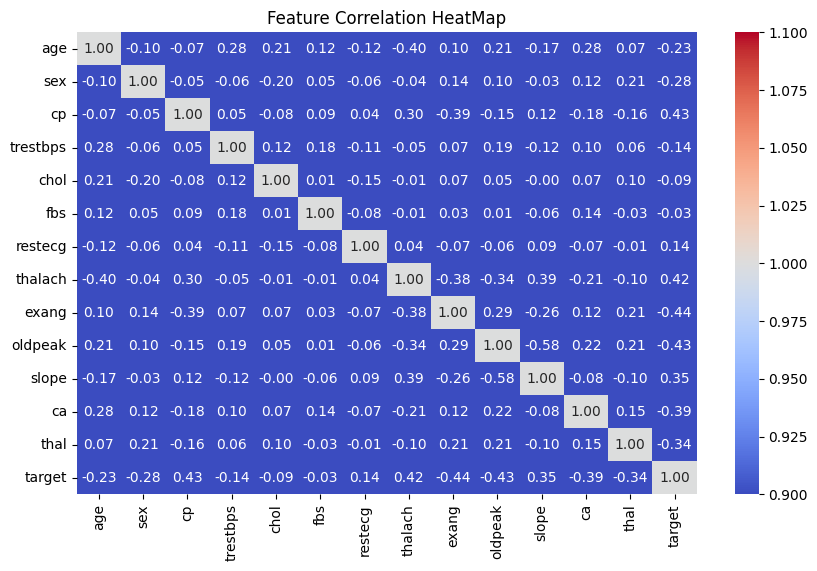

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',vmin=1,vmax=1,fmt=".2f",cbar='True')
plt.title("Feature Correlation HeatMap")
plt.show()

In [20]:
X=df[['age','cp','thalach']]
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [27]:
#predict
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0])

In [30]:
#Accuracy
print(f"Accuracy: {accuracy_score(y_test,y_pred):.2f}")


Accuracy: 0.80


In [29]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [39]:
# User input function for prediction
def predict_heart_disease():
    age = int(input("Enter age: "))
    cp = int(input("Enter chest pain type (0-3): "))
    thalach = int(input("Enter maximum heart rate achieved: "))

    user_data = pd.DataFrame([[age, cp, thalach]], columns=['age', 'cp', 'thalach'])
    prediction = model.predict(user_data)

    result = "Heart Disease Present" if prediction[0] == 1 else "No Heart Disease"
    print(f"Prediction: {result}")

# Call the user input function to test
predict_heart_disease()

Enter age: 100
Enter chest pain type (0-3): 3
Enter maximum heart rate achieved: 65
Prediction: No Heart Disease
